In [ ]:
import argparse
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from pickle import dump
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from utils import RANDOM_STATE, TRAIN_TEST_SPLIT, logInfo
import shap

script_dir = os.getcwd()


def remove_dataframe_features_with_all_null_values(dataframe):
    logInfo("Removing features with all null values")
    null_columns = dataframe.columns[dataframe.isnull().all()]
    dataframe.drop(null_columns, axis=1, inplace=True)
    return dataframe


logInfo(f"Reading subset_normalized_json_file_with_scaler.json")
df = pd.read_json(
    os.path.join(
        script_dir, "..", "pretrain", "subset_normalized_json_file_with_scaler.json"
    )
)
df = remove_dataframe_features_with_all_null_values(df)

X = df.drop(columns=["elliptic_label"])  # delete unused
y = df["elliptic_label"]

train_test_ratio = f"{int((1-TRAIN_TEST_SPLIT)*100)}-{int(TRAIN_TEST_SPLIT*100)}"

# legal = 2, illegal = 1

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=TRAIN_TEST_SPLIT, random_state=RANDOM_STATE
)

# -----------------------------------------
# Random Forest
# -----------------------------------------
logInfo(f"Training random forest")

rf_params = {
    "max_features": None,
    "max_depth": 10,
}

model_RF = RandomForestClassifier(**rf_params).fit(
    X_train.values,
    y_train.values,
)



2025-03-23 20:19:52 [INFO]: Reading subset_normalized_json_file_with_scaler.json
2025-03-23 20:22:08 [INFO]: Removing features with all null values
2025-03-23 20:22:11 [INFO]: Training random forest


In [28]:
# -----------------------------------------
# SHAP analysis
# -----------------------------------------
explainer = shap.TreeExplainer(model_RF)
shap_values = explainer.shap_values(X)
shap.initjs()
# shap.summary_plot(shap_values, X, feature_names=X.columns, show=False)


C:\Users\Linas.Pocius\AppData\Local\Temp\ipykernel_16132\1656726915.py:1: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values[:,:,0], X, show=False)


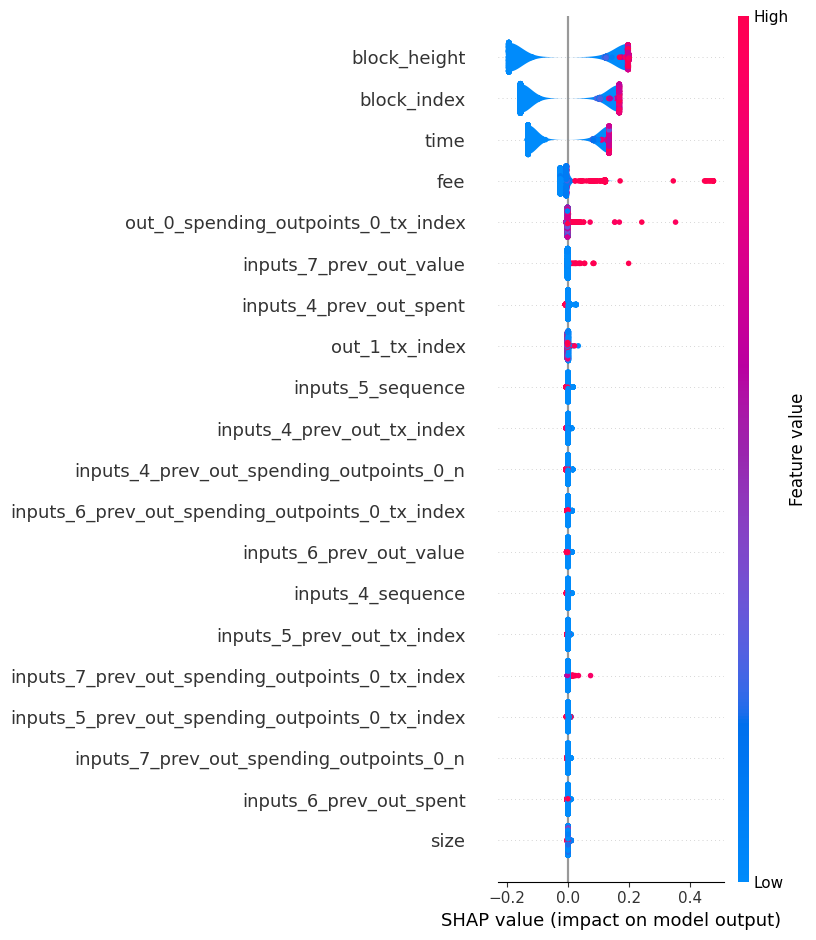

In [43]:
shap.summary_plot(shap_values[:,:,0], X, show=False)
plt.savefig("shap_summary_plot_class0.png")
shap.plots.violin(shap_values[:,:,0], features=X.columns)